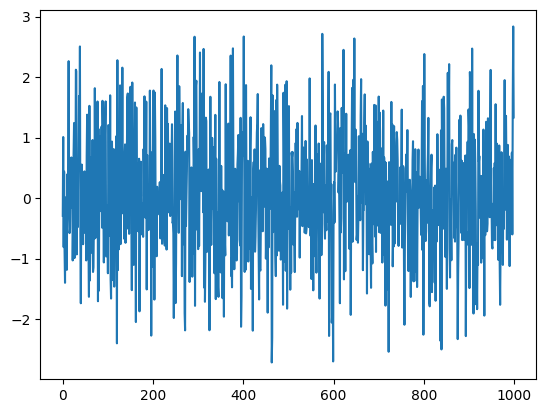

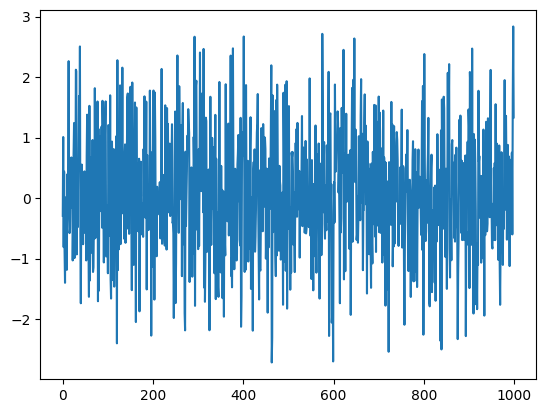

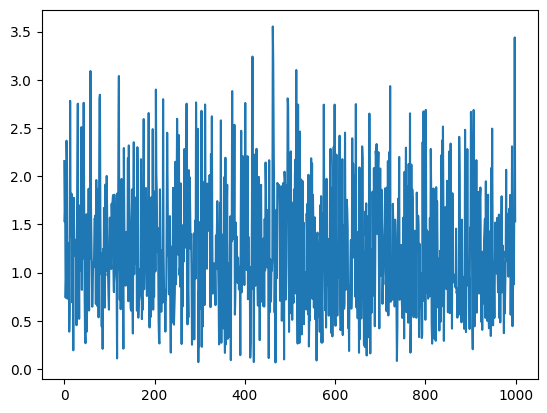

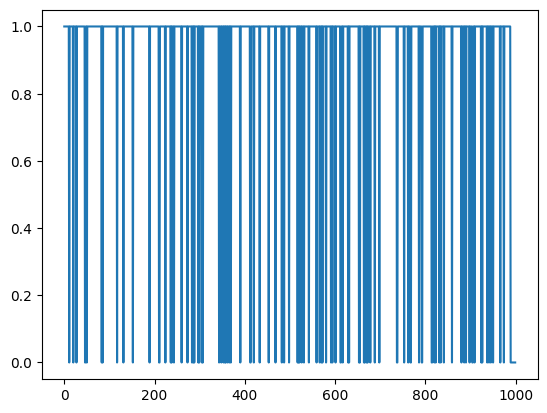

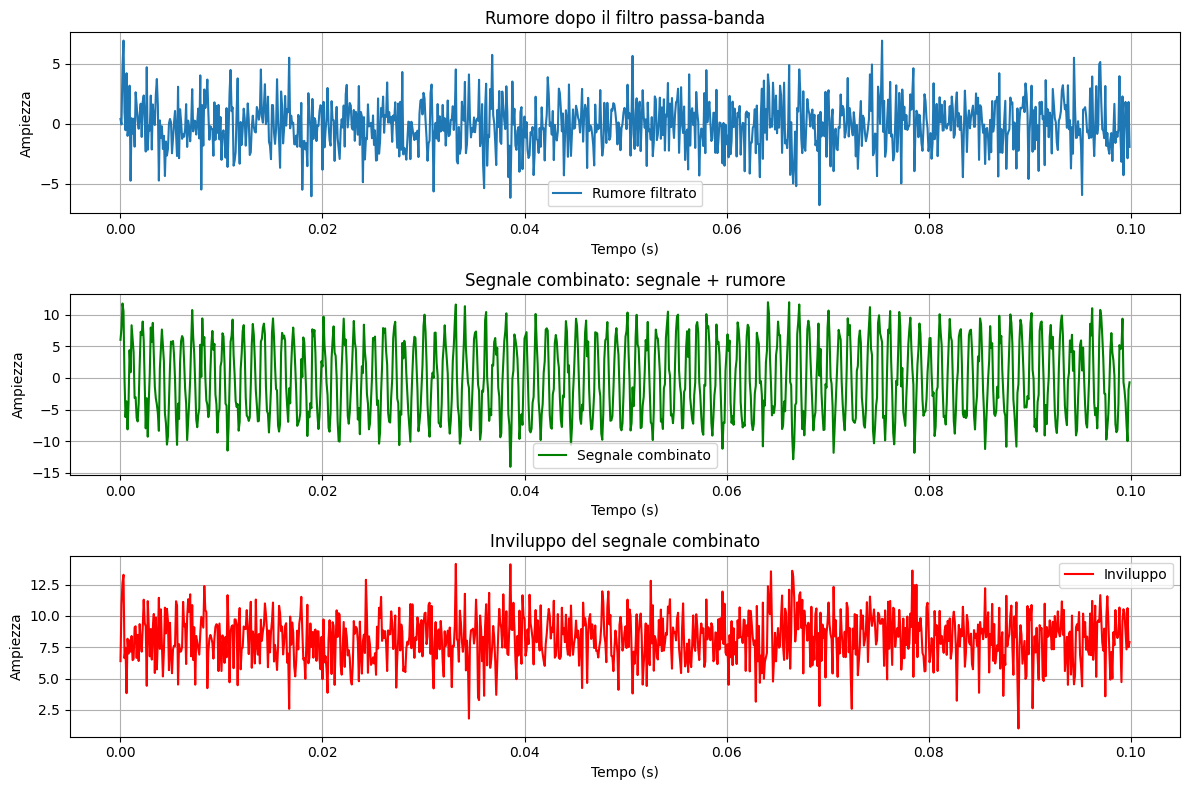

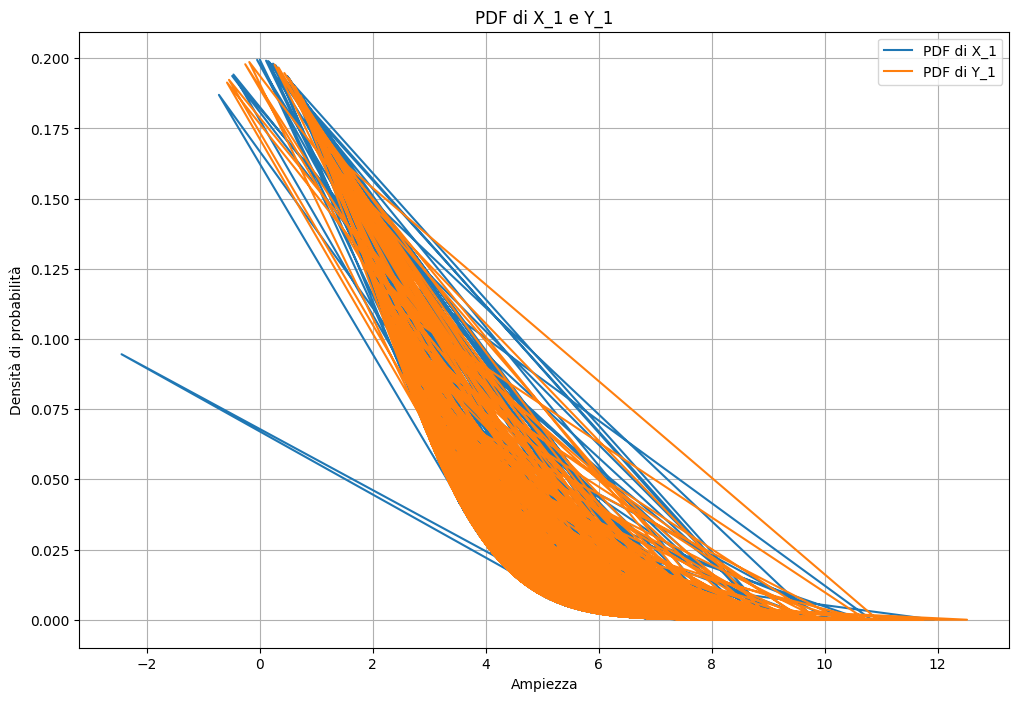

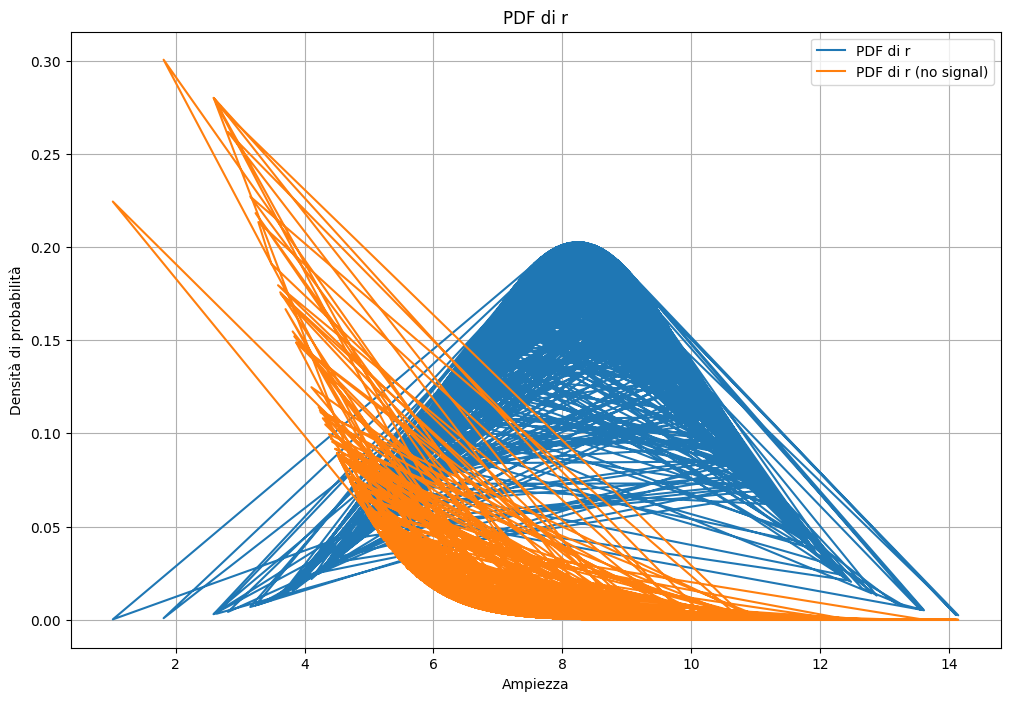

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import random
import math

#generate a random gaussian signal
def generate_gaussian_signal(mean, std, num_samples):
    signal = np.random.normal(mean, std, num_samples)
    return signal

#generate a random uniform signal
def generate_uniform_signal(low, high, num_samples):
    signal = np.random.uniform(low, high, num_samples)
    return signal

#generate a Rayleigh PDF signal
def generate_rayleigh_signal(beta, num_samples):
    signal = np.random.rayleigh(beta, num_samples)
    return signal

mean = 0
std = 1
num_samples = 1000
I_signal = generate_gaussian_signal(mean, std, num_samples)
Q_signal = generate_gaussian_signal(mean, std, num_samples)
plt.plot(I_signal)
plt.show()

#signal received is I+jQ
signal_received = I_signal + 1j*Q_signal
plt.plot(signal_received.real)
plt.show()

#calculate the magnitude of the signal received
magnitude = abs(signal_received)
plt.plot(magnitude)
plt.show()

#for every sample, check if its amplitude is over the primary threshold.
#if, in a group of 16, there are more than the secondary threshold number of samples over the primary threshold, then the target is detected.
primary_threshold = 0.5
secondary_threshold = 10
detection = np.zeros(num_samples)
for i in range(num_samples):
    if magnitude[i] > primary_threshold:
        if sum(magnitude[i:i+16] > primary_threshold) > secondary_threshold:
            detection[i] = 1

plt.plot(detection)
plt.show()

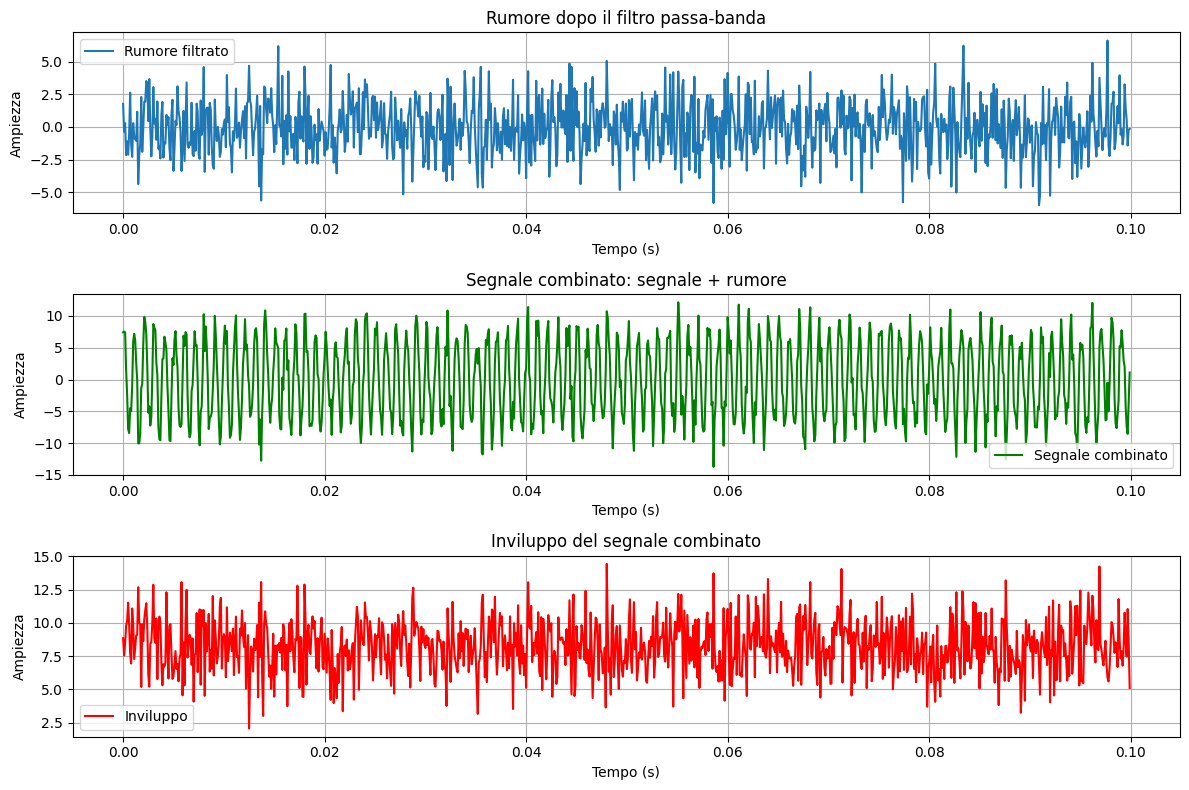

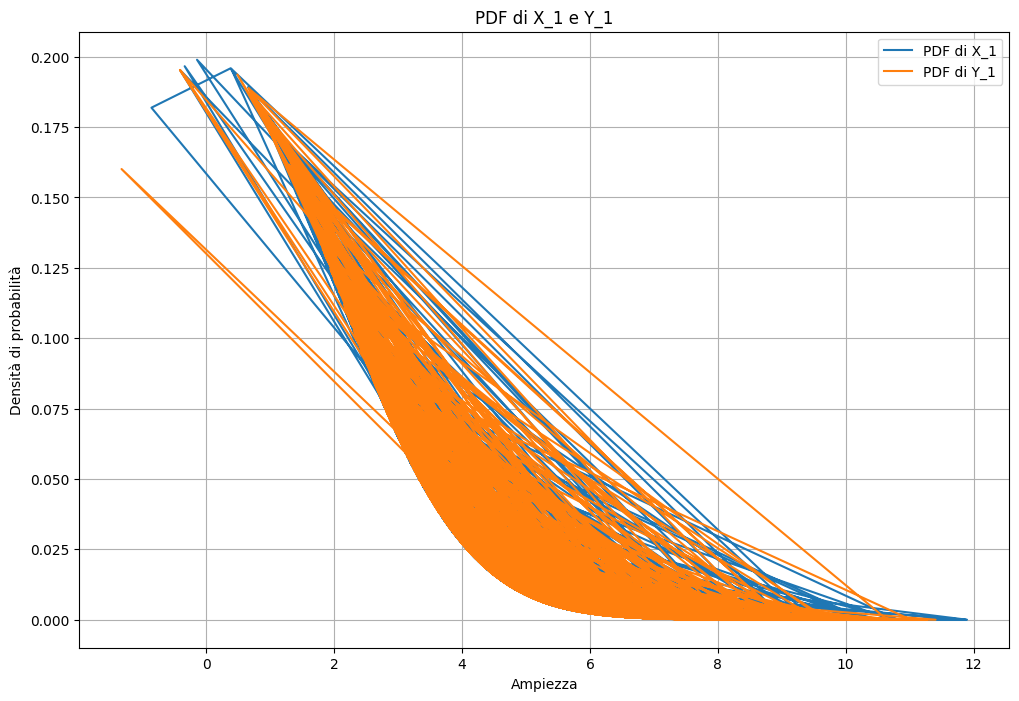

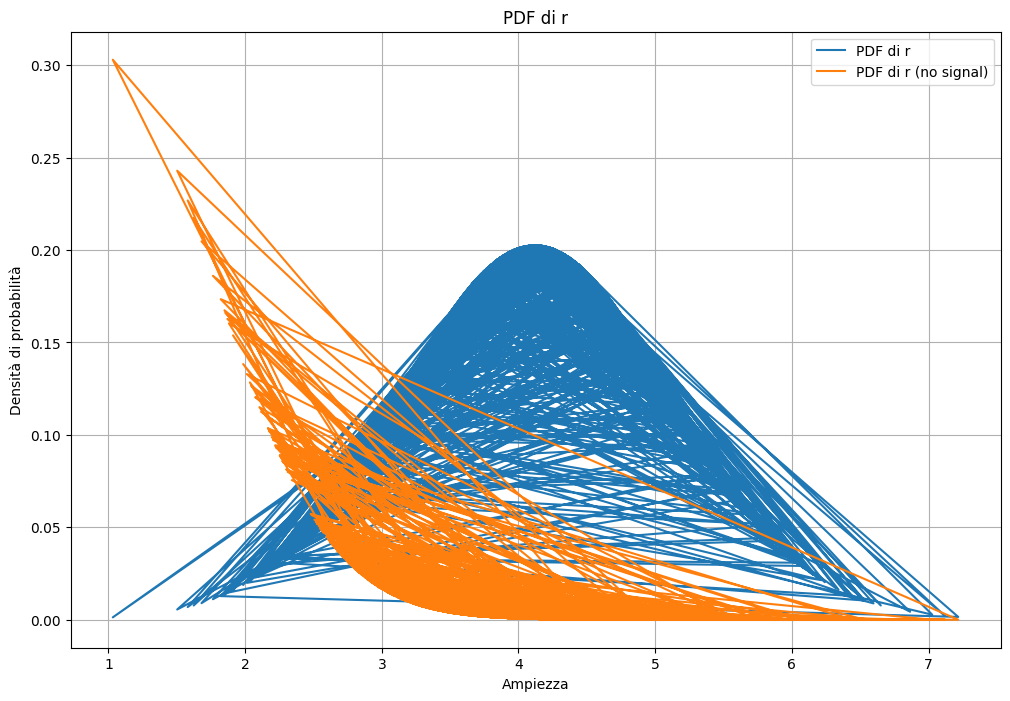

0.04393693362340742


In [11]:
# Definizione dei parametri
fs = 1e4  # Frequenza di campionamento (Hz)
duration = 0.1  # Durata del segnale (s)
t = np.arange(0, duration, 1/fs)  # Vettore temporale

# Parametri del filtro passa-banda
f_c = 1000  # Frequenza centrale (Hz)
f_B = 100  # Larghezza di banda (Hz)

# Parametri del rumore
N0 = 1/25  # Densità spettrale di potenza a due lati
beta = np.sqrt(N0 * f_B)  # Deviazione standard del rumore

# Parametri del segnale
a = 4 * np.sqrt(2) # Ampiezza della componente coseno
b = 4 * np.sqrt(2)  # Ampiezza della componente seno
A = np.sqrt(a**2 + b**2)  # Ampiezza risultante
phi_s = np.arctan2(b, a)  # Fase risultante

# Simulazione del rumore filtrato
X_t = np.random.normal(0, beta, len(t))
Y_t = np.random.normal(0, beta, len(t))
noise = X_t * np.cos(2 * np.pi * f_c * t) + Y_t * np.sin(2 * np.pi * f_c * t)

# Simulazione del segnale sinusoidale
signal = a * np.cos(2 * np.pi * f_c * t) + b * np.sin(2 * np.pi * f_c * t)

# Segnale combinato
combined_signal = signal + noise

# Calcolo dell'inviluppo
r_t = np.sqrt((a + X_t)**2 + (b + Y_t)**2)
phi_t = np.arctan2(b + Y_t, a + X_t)

# Plot dei risultati
plt.figure(figsize=(12, 8))

# Rumore filtrato
plt.subplot(3, 1, 1)
plt.plot(t, noise, label="Rumore filtrato")
plt.title("Rumore dopo il filtro passa-banda")
plt.xlabel("Tempo (s)")
plt.ylabel("Ampiezza")
plt.grid()
plt.legend()

# Segnale combinato
plt.subplot(3, 1, 2)
plt.plot(t, combined_signal, label="Segnale combinato", color="green")
plt.title("Segnale combinato: segnale + rumore")
plt.xlabel("Tempo (s)")
plt.ylabel("Ampiezza")
plt.grid()
plt.legend()

# Inviluppo del segnale
plt.subplot(3, 1, 3)
plt.plot(t, r_t, label="Inviluppo", color="red")
plt.title("Inviluppo del segnale combinato")
plt.xlabel("Tempo (s)")
plt.ylabel("Ampiezza")
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()

X_1 = a + X_t
Y_1 = b + Y_t

# PDFs of X_1 and Y_1
p1_x1 = 1/(beta*np.sqrt(2*np.pi)) * np.exp(-0.5*(X_1/beta)**2)
p2_y1 = 1/(beta*np.sqrt(2*np.pi)) * np.exp(-0.5*(Y_1/beta)**2)

# Plot of the PDFs
plt.figure(figsize=(12, 8))
plt.plot(X_1, p1_x1, label="PDF di X_1")
plt.plot(Y_1, p2_y1, label="PDF di Y_1")
plt.title("PDF di X_1 e Y_1")
plt.xlabel("Ampiezza")
plt.ylabel("Densità di probabilità")
plt.grid()
plt.legend()
plt.show()

# two-dimensional joint PDF of X_1 and Y_1
p_x1y1 = 1/(2*np.pi*beta**2) * np.exp(-0.5*(X_1**2 + Y_1**2)/beta**2)
p_rphi = r_t/(2*np.pi*beta**2) * np.exp(-0.5*(r_t**2 + a**2 + b**2 -2*r_t*a*np.cos(phi_t) - 2*r_t*b*np.sin(phi_t))/beta**2)

p_r = r_t/beta**2 * np.exp(-0.5*(r_t**2 + A**2)/beta**2) * sp.special.i0(r_t*A/beta**2)


p0_r = r_t/beta**2 * np.exp(-0.5*r_t**2/beta**2)

# Plot of the PDFs
plt.figure(figsize=(12, 8))
plt.plot(r_t/beta, p_r, label="PDF di r")
plt.plot(r_t/beta, p0_r, label="PDF di r (no signal)")
plt.title("PDF di r")
plt.xlabel("Ampiezza")
plt.ylabel("Densità di probabilità")
plt.grid()
plt.legend()
plt.show()

Vt = 2.5 * beta
Pfa = np.exp(-(Vt**2)/(2*beta**2))
print(Pfa)
